# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Setting up my URL and query URL
# There was an issue where it was reading in metric so I converted it to imperial:
# https://openweathermap.org/current#format
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
# Query URL:
query_url = url + "appid=" + weather_api_key + "&q="
#requests.get(query_url + 'portland').json()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

628


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Lists
cityname = []
cityID = []
lat = []
lng = []
maxtemp = []
humidity = [] 
cloudiness = []
windspeed = []
country = []
date = []
# Counter
record = 0

print('''
Beginning Data Retrieval
------------------------
    ''')
#Probably going to run into fetching errors so this is where we may have to do try and except
for i in cities:
    try: 
        data_loop = requests.get(query_url + i).json()
        record += 1
        cityname.append(data_loop['name'])
        cityID.append(data_loop['id'])
        lat.append(data_loop['coord']['lat'])
        lng.append(data_loop['coord']['lon'])
        maxtemp.append(data_loop['main']['temp_max'])
        humidity.append(data_loop['main']['humidity'])
        cloudiness.append(data_loop['clouds']['all'])
        windspeed.append(data_loop['wind']['speed'])
        country.append(data_loop['sys']['country'])
        date.append(data_loop['dt'])
        print(f'Processing Record {record} for the city of: {i.title()}')
        #if record > 9: #will need to set this to 50 when I run the full report
            #record = 0
    except KeyError:
        print(f'City was not found for Record {record}...skipping to next line')
print('''
-----------------------
Data Retrieval Complete
-----------------------
''')



Beginning Data Retrieval
------------------------
    
Processing Record 1 for the city of: Port Elizabeth
Processing Record 2 for the city of: Bredasdorp
Processing Record 3 for the city of: East London
Processing Record 4 for the city of: Huesca
Processing Record 5 for the city of: Hobart
Processing Record 6 for the city of: Mahebourg
Processing Record 7 for the city of: Port Alfred
Processing Record 8 for the city of: Ngama
Processing Record 9 for the city of: Albany
Processing Record 10 for the city of: Beringovskiy
City was not found for Record 11...skipping to next line
Processing Record 12 for the city of: Carmen
Processing Record 13 for the city of: Mataura
Processing Record 14 for the city of: Corning
Processing Record 15 for the city of: Rikitea
Processing Record 16 for the city of: Puerto Ayora
Processing Record 17 for the city of: Chicama
Processing Record 18 for the city of: Komsomolskiy
City was not found for Record 19...skipping to next line
Processing Record 20 for the

Processing Record 168 for the city of: Coquimbo
Processing Record 169 for the city of: Hilo
Processing Record 170 for the city of: Kahului
Processing Record 171 for the city of: Carrick-On-Suir
Processing Record 172 for the city of: Flin Flon
Processing Record 173 for the city of: Igrim
Processing Record 174 for the city of: Kieta
Processing Record 175 for the city of: Bonthe
Processing Record 176 for the city of: Conceicao Do Araguaia
Processing Record 177 for the city of: Banda Aceh
Processing Record 178 for the city of: Ouadda
Processing Record 179 for the city of: Vila Velha
Processing Record 180 for the city of: Russellville
Processing Record 181 for the city of: Moron
Processing Record 182 for the city of: Saldanha
Processing Record 183 for the city of: Chokurdakh
Processing Record 184 for the city of: Camocim
Processing Record 185 for the city of: Skjervoy
Processing Record 186 for the city of: Mirador
Processing Record 187 for the city of: Maarianhamina
Processing Record 188 fo

Processing Record 337 for the city of: Zhigansk
Processing Record 338 for the city of: Maryborough
Processing Record 339 for the city of: San Patricio
Processing Record 340 for the city of: Madawaska
City was not found for Record 341...skipping to next line
Processing Record 342 for the city of: Jelenia Gora
Processing Record 343 for the city of: Saskylakh
Processing Record 344 for the city of: Port Hardy
Processing Record 345 for the city of: Severo-Kurilsk
Processing Record 346 for the city of: Poso
Processing Record 347 for the city of: Road Town
Processing Record 348 for the city of: Bandar
Processing Record 349 for the city of: Shiraz
Processing Record 350 for the city of: Huarmey
City was not found for Record 351...skipping to next line
Processing Record 352 for the city of: Ipixuna
Processing Record 353 for the city of: Caravelas
Processing Record 354 for the city of: Alta Gracia
Processing Record 355 for the city of: San Carlos De Bariloche
Processing Record 356 for the city of

Processing Record 505 for the city of: Bara
Processing Record 506 for the city of: Indian Head
Processing Record 507 for the city of: Sechura
Processing Record 508 for the city of: Ugoofaaru
Processing Record 509 for the city of: Krasnoarmeysk
Processing Record 510 for the city of: Kuytun
Processing Record 511 for the city of: Neuquen
Processing Record 512 for the city of: Rapar
Processing Record 513 for the city of: Nanakuli
Processing Record 514 for the city of: Bira
Processing Record 515 for the city of: Goure
Processing Record 516 for the city of: Shirakawa
Processing Record 517 for the city of: Troyes
Processing Record 518 for the city of: Tjome
Processing Record 519 for the city of: Mirabad
Processing Record 520 for the city of: Kangavar
Processing Record 521 for the city of: Bakani
Processing Record 522 for the city of: Manutuke
Processing Record 523 for the city of: Fortuna
Processing Record 524 for the city of: Newport
Processing Record 525 for the city of: Biak
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
weather_dict = {'City': cityname,'Lat':lat,'Long':lng,'Max Temp': maxtemp,'Humidity':humidity,\
               'Cloudiness': cloudiness, 'Wind Speed':windspeed, 'Country': country, 'Date':date}
weather_df = pd.DataFrame(weather_dict)
#Conversion of time 
#weather_df['Date']=(pd.to_datetime(weather_df['Date'],unit='s')) 
#timestamp = weather_df['Date']
#export
weather_df.to_csv(r'Weather_DF.csv')

In [96]:
weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.92,25.57,59.00,62,52,21.92,ZA,7/13/2020
1,Bredasdorp,-34.53,20.04,50.00,81,91,17.22,ZA,7/13/2020
2,East London,-33.02,27.91,69.62,39,3,15.95,ZA,7/13/2020
3,Huesca,42.14,-0.41,88.00,31,24,12.75,ES,7/13/2020
4,Hobart,-42.88,147.33,41.00,86,90,2.24,AU,7/13/2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
#  Get the indices of cities that have humidity over 100%.
highumid = weather_df.loc[(weather_df['Humidity']>100)]
highumid
# There are no cities with humidity > 100

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [91]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
nohumidity_df = weather_df
humidindex = nohumidity_df[nohumidity_df['Humidity'] > 100 ].index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=nohumidity_df.drop(humidindex, inplace=False)
clean_city_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.92,25.57,59.00,62,52,21.92,ZA,7/13/2020
1,Bredasdorp,-34.53,20.04,50.00,81,91,17.22,ZA,7/13/2020
2,East London,-33.02,27.91,69.62,39,3,15.95,ZA,7/13/2020
3,Huesca,42.14,-0.41,88.00,31,24,12.75,ES,7/13/2020
4,Hobart,-42.88,147.33,41.00,86,90,2.24,AU,7/13/2020
...,...,...,...,...,...,...,...,...,...
572,Manaure,11.78,-72.44,89.49,55,8,22.24,CO,7/13/2020
573,La Baule-Escoublac,47.29,-2.36,80.60,36,21,6.93,FR,7/13/2020
574,Nuuk,64.18,-51.72,59.00,54,20,5.82,GL,7/13/2020
575,Broome,42.25,-75.83,75.00,73,75,8.05,US,7/13/2020


In [95]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv(r'Clean City Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

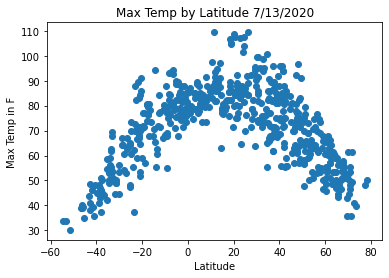

In [82]:
# x axis is lat and y = max temp in F 
date = "7/13/2020"
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']
plt.scatter(x_axis, y_axis)
#plot.scatter(kind="scatter", x="Latitude", y="Max Temp", grid=False, figsize=(6,5),
             # title="Testing")
# label
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
plt.title("Max Temp by Latitude " + date )
plt.show()

## Latitude vs. Humidity Plot

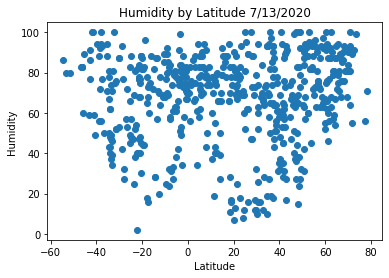

In [92]:
# x axis is lat and y = max temp in F 
x_axis2 = weather_df['Lat']
y_axis2 = weather_df['Humidity']
plt.scatter(x_axis2, y_axis2)
#plot.scatter(kind="scatter", x="Latitude", y="Max Temp", grid=False, figsize=(6,5),
             # title="Testing")
# label
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity by Latitude " + date )
plt.show()

## Latitude vs. Cloudiness Plot

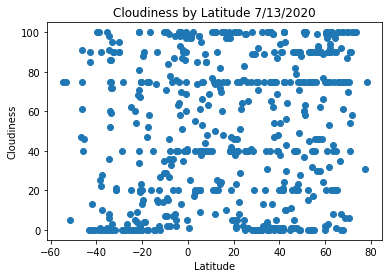

In [93]:
# x axis is lat and y = max temp in F 
x_axis3 = weather_df['Lat']
y_axis3 = weather_df['Cloudiness']
plt.scatter(x_axis3, y_axis3)
#plot.scatter(kind="scatter", x="Latitude", y="Max Temp", grid=False, figsize=(6,5),
             # title="Testing")
# label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness by Latitude " + date )
plt.show()

## Latitude vs. Wind Speed Plot

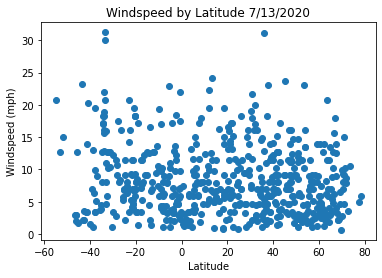

In [94]:
# x axis is lat and y = max temp in F 
x_axis4 = weather_df['Lat']
y_axis4 = weather_df['Wind Speed']
plt.scatter(x_axis4, y_axis4)
#plot.scatter(kind="scatter", x="Latitude", y="Max Temp", grid=False, figsize=(6,5),
             # title="Testing")
# label
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title("Windspeed by Latitude " + date )
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# My function will loop through my lists so I can call the function for whatever my two variables are for the x
# and y axis. I will then call the function in a loop of the list. 

In [12]:
def linfunct(x_values, y_values,title,xlabel,ylabel,i,l):
    #Stats will call from my variable above and then look for what ever argument I establish in ()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plot and format
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,(i,l), fontsize=10,color="red")
    print(f'The correlation coefficient: {rvalue}')
    #label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[(weather_df['Lat']>0.01)]
southern_df = weather_df.loc[(weather_df['Lat']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient: -0.7313599344961104


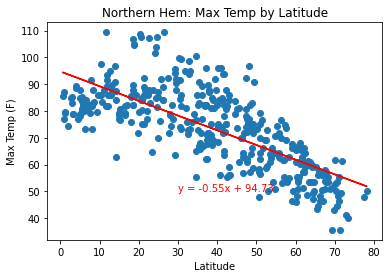

In [14]:
linfunct(northern_df["Lat"],northern_df['Max Temp'],\
         title="Northern Hem: Max Temp by Latitude",xlabel = "Latitude", ylabel = "Max Temp (F)", i=30,l=50)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient: 0.8478024800993426


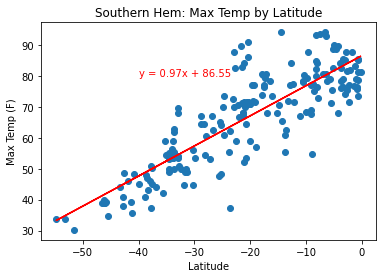

In [15]:
linfunct(southern_df['Lat'],southern_df['Max Temp']\
         ,title="Southern Hem: Max Temp by Latitude",xlabel = "Latitude", ylabel = "Max Temp (F)",i=-40,l=80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient: 0.16814099134451985


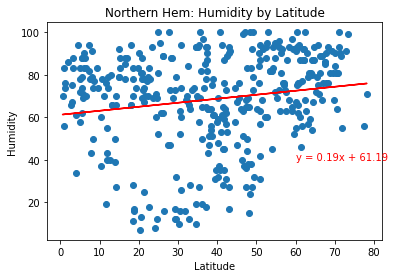

In [18]:
linfunct(northern_df['Lat'],northern_df['Humidity'],\
         title="Northern Hem: Humidity by Latitude",xlabel = "Latitude", ylabel = "Humidity", i=60,l=40)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient: -0.07312229004277919


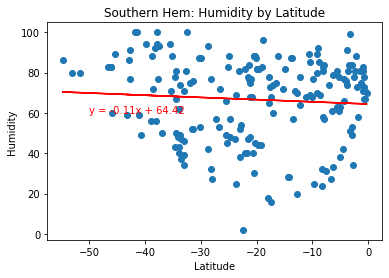

In [19]:
linfunct(southern_df['Lat'],southern_df['Humidity'],title="Southern Hem: Humidity by Latitude",\
         xlabel = "Latitude", ylabel = "Humidity", i=-50,l=60)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient: 0.0881241168148737


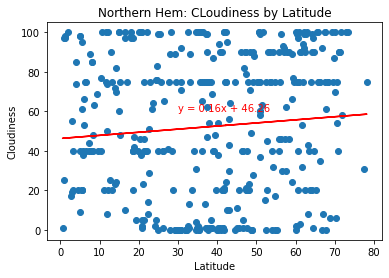

In [20]:
linfunct(northern_df['Lat'],northern_df['Cloudiness'],title="Northern Hem: CLoudiness by Latitude",\
         xlabel = "Latitude", ylabel = "Cloudiness", i=30,l=60)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient: 0.13115987553499037


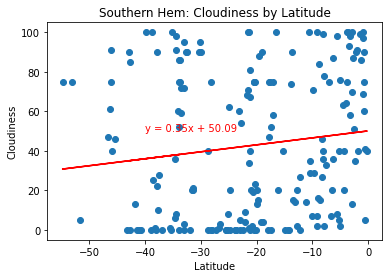

In [21]:
linfunct(southern_df['Lat'],southern_df['Cloudiness'],title="Southern Hem: Cloudiness by Latitude",\
         xlabel = "Latitude", ylabel = "Cloudiness",i=-40,l=50)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient: -0.07263886551670189


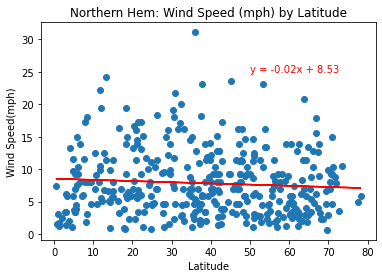

In [22]:
linfunct(northern_df['Lat'],northern_df['Wind Speed'],title="Northern Hem: Wind Speed (mph) by Latitude",\
         xlabel = "Latitude", ylabel = "Wind Speed(mph)", i=50,l=25)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient: -0.15236134458321424


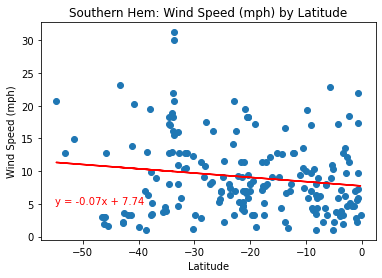

In [24]:
linfunct(southern_df['Lat'],southern_df['Wind Speed'],title="Southern Hem: Wind Speed (mph) by Latitude",\
         xlabel = "Latitude", ylabel = "Wind Speed (mph)",i=-55,l=5)